In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Clustering

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn for clustering and preprocessing
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# For visualization
%matplotlib inline
sns.set(style="whitegrid")

In [3]:
# Load the new dataset for analysis
new_file_path = '/content/drive/MyDrive/BERTTopic_Models/paraphrase-MiniLM-L6-v2/results/all_books_all_topics.csv'
bigger_data = pd.read_csv(new_file_path)

# Display basic information and the first few rows to understand the structure

bigger_data.head(), bigger_data.info()
bigger_data = pd.read_csv(new_file_path)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22575 entries, 0 to 22574
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Book Title   22575 non-null  object 
 1   Topic        22575 non-null  object 
 2   Topic_Label  22575 non-null  object 
 3   Probability  22575 non-null  float64
dtypes: float64(1), object(3)
memory usage: 705.6+ KB


In [18]:
# Cell 3: Prepare the Data
# Select only the topic columns
topic_columns = [col for col in reshaped_data.columns if col.startswith('Topic_')]
data = reshaped_data[topic_columns]

# Ensure probabilities are normalized (optional, if necessary)
# data = data.div(data.sum(axis=1), axis=0)

In [19]:
# Cell 4: Remove Low-Variance Topics
# Remove topics with very low variance to focus on discriminative features
variance = data.var()
high_variance_topics = variance[variance > variance.quantile(0.1)].index  # Keep topics above the 10th percentile of variance
data = data[high_variance_topics]
print(f"Number of topics after variance thresholding: {len(high_variance_topics)}")

Number of topics after variance thresholding: 193


In [20]:
# Cell 5: Dimensionality Reduction with PCA
# Reduce dimensionality to avoid the curse of dimensionality
pca = PCA(n_components=0.95)  # Retain components that explain 95% of the variance
pca_result = pca.fit_transform(data)
print(f"Number of PCA components retained: {pca.n_components_}")

Number of PCA components retained: 1


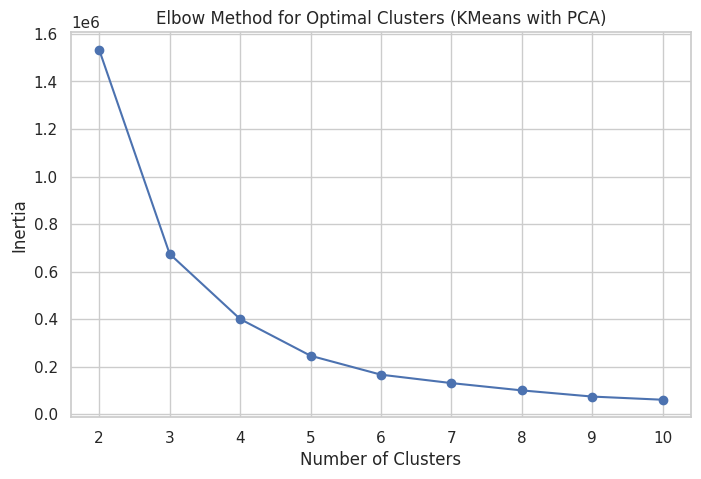

In [21]:
# Cell 6: Determine Optimal Number of Clusters using Elbow Method
inertia = []
cluster_range = range(2, 11)  # Starting from 2 clusters

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_result)
    inertia.append(kmeans.inertia_)

# Plot the elbow method results
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters (KMeans with PCA)')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

In [22]:
# Cell 7: Fit KMeans with Selected Number of Clusters
n_clusters = 3  # Choose based on elbow method or domain knowledge
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
reshaped_data['Cluster_KMeans'] = kmeans.fit_predict(pca_result)

In [23]:
# Cell 8: Evaluate Clustering Quality
score = silhouette_score(pca_result, reshaped_data['Cluster_KMeans'])
print(f"Silhouette Score for KMeans with {n_clusters} clusters: {score:.4f}")

Silhouette Score for KMeans with 3 clusters: 0.5827


In [24]:
# Cell 9: Compute Cluster Profiles
cluster_profiles = reshaped_data.groupby('Cluster_KMeans')[topic_columns].mean()

In [25]:
# Cell 10: Generate Cluster Reports
def get_cluster_report(cluster_profiles, topic_labels, n_top_topics=30):
    reports = {}
    for cluster_label, row in cluster_profiles.iterrows():
        # Get top n topics with highest mean probability in this cluster
        top_topics = row.sort_values(ascending=False).head(n_top_topics)
        # Create a DataFrame with Topic IDs, Labels, and Mean Probabilities
        topics_with_labels = pd.DataFrame({
            'Topic_ID': top_topics.index,
            'Topic_Label': top_topics.index.map(topic_labels),
            'Mean_Probability': top_topics.values
        })
        reports[cluster_label] = topics_with_labels
    return reports

reports = get_cluster_report(cluster_profiles, topic_labels)

# Display the reports
for cluster_label, topics_df in reports.items():
    print(f"\nCluster {cluster_label} (KMeans):")
    display(topics_df)


Cluster 0 (KMeans):


,Topic_ID,Topic_Label,Mean_Probability
0,Topic_72,Love and Affection,56.179519
1,Topic_70,Leaving and Letting Go,54.273495
2,Topic_201,Happiness and Gratitude,53.195251
3,Topic_102,Pleasure and Seduction,52.743543
4,Topic_175,Moments and Realizations,51.378929
5,Topic_129,Breaking and Letting Go,50.337144
6,Topic_0,Expressions of Joy and Amusement,50.149899
7,Topic_117,Possession and Desire,49.657378
8,Topic_36,Nods and Agreement,49.494623
9,Topic_12,Nightlife and Events,48.915423



Cluster 1 (KMeans):


,Topic_ID,Topic_Label,Mean_Probability
0,Topic_70,Leaving and Letting Go,83.676551
1,Topic_72,Love and Affection,83.332764
2,Topic_102,Pleasure and Seduction,81.832056
3,Topic_117,Possession and Desire,81.322740
4,Topic_201,Happiness and Gratitude,81.109163
5,Topic_129,Breaking and Letting Go,79.294983
6,Topic_175,Moments and Realizations,79.119320
7,Topic_0,Expressions of Joy and Amusement,77.696095
8,Topic_14,Conversations and Communication,76.266857
9,Topic_36,Nods and Agreement,75.582944



Cluster 2 (KMeans):


,Topic_ID,Topic_Label,Mean_Probability
0,Topic_72,Love and Affection,25.411529
1,Topic_70,Leaving and Letting Go,24.333454
2,Topic_201,Happiness and Gratitude,23.779251
3,Topic_102,Pleasure and Seduction,23.507516
4,Topic_175,Moments and Realizations,22.996975
5,Topic_129,Breaking and Letting Go,22.269862
6,Topic_0,Expressions of Joy and Amusement,22.144864
7,Topic_36,Nods and Agreement,22.045605
8,Topic_12,Nightlife and Events,21.610418
9,Topic_167,Romance and Feelings,21.516236


In [15]:
# Reshape the dataset to wide format: one row per book, one column per topic probability
reshaped_data = bigger_data.pivot_table(
    index='Book Title',
    columns='Topic',
    values='Probability',
    aggfunc='mean'
).fillna(0)

# Prepare the topic labels for reference
topic_labels = bigger_data[['Topic', 'Topic_Label']].drop_duplicates().set_index('Topic')['Topic_Label']

# Display the reshaped data and topic labels for verification
reshaped_data.head(), topic_labels.head()

(Topic                                    Topic_0    Topic_1   Topic_10  \
 Book Title                                                               
 A Long Time Coming                     79.474938  56.317327  69.781076   
 A Not So Meet Cute                     71.655854  51.052766  63.149428   
 Ache for You                           56.319151  38.191399  51.023719   
 An Accidental Date with a Billionaire  26.288002  18.064906  23.180115   
 Bad Boss                               43.874309  29.619211  40.246871   
 
 Topic                                  Topic_100  Topic_101  Topic_102  \
 Book Title                                                               
 A Long Time Coming                     28.041094  62.643593  86.409227   
 A Not So Meet Cute                     22.492508  56.784662  77.896244   
 Ache for You                           19.264886  45.389982  58.180555   
 An Accidental Date with a Billionaire   8.502990  21.700494  26.564325   
 Bad Boss              

# Statistical Analysis

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
import pandas as pd

print(f"Pandas version: {pd.__version__}")

Pandas version: 2.2.2


In [ ]:
# Comparative Metrics Across Clusters - Shared Themes Using Pearson Correlation

from scipy.stats import pearsonr
import pandas as pd
import os

# Initialize a list to store Pearson correlation results
correlation_results = []

for k in cluster_range:
    print(f"\nCalculating Pearson Correlation for shared themes in k={k}...")

    # Load cluster profiles for k
    profiles_path = os.path.join(output_dir, f'cluster_profiles_k{k}.csv')
    profiles_df = pd.read_csv(profiles_path)

    # Select only the necessary columns to avoid including grouping columns
    profiles_subset = profiles_df[['Cluster', 'Topic', 'Mean_Probability']]

    # Get the top 30 topics for each cluster
    top_n = 30
    # Remove 'include_groups=False' to avoid the TypeError
    top_topics_df = profiles_subset.groupby('Cluster', group_keys=False).apply(
        lambda x: x.nlargest(top_n, 'Mean_Probability')
    )

    # Get the list of unique clusters
    clusters = top_topics_df['Cluster'].unique()

    # Iterate through each unique pair of clusters
    for i in range(len(clusters)):
        for j in range(i+1, len(clusters)):
            cluster_a = clusters[i]
            cluster_b = clusters[j]

            # Extract mean probabilities for the top 30 topics in each cluster
            topics_a = top_topics_df[top_topics_df['Cluster'] == cluster_a].set_index('Topic')['Mean_Probability']
            topics_b = top_topics_df[top_topics_df['Cluster'] == cluster_b].set_index('Topic')['Mean_Probability']

            # Find common topics between the two clusters
            common_topics = topics_a.index.intersection(topics_b.index)

            if len(common_topics) < 2:
                print(f"Not enough common topics between Cluster {cluster_a} and Cluster {cluster_b} for k={k}. Skipping...")
                continue

            # Extract the probabilities for the common topics
            prob_a = topics_a[common_topics]
            prob_b = topics_b[common_topics]

            # Calculate Pearson correlation
            corr_coef, p_val = pearsonr(prob_a, prob_b)

            # Append the results to the list
            correlation_results.append({
                'k': k,
                'Cluster_A': cluster_a,
                'Cluster_B': cluster_b,
                'Pearson_Correlation': corr_coef,
                'P_Value': p_val
            })

    # Display the correlations for current k
    correlations_df = pd.DataFrame([res for res in correlation_results if res['k'] == k])
    print(f"\nPearson Correlation Coefficients for k={k}:")
    display(correlations_df[['Cluster_A', 'Cluster_B', 'Pearson_Correlation', 'P_Value']])

# Convert the complete list to a DataFrame
shared_themes_df = pd.DataFrame(correlation_results)

# Save the shared themes correlations to CSV
shared_themes_output = os.path.join(output_dir, 'shared_themes_pearson_correlation.csv')
shared_themes_df.to_csv(shared_themes_output, index=False)
print(f"\nSaved shared themes Pearson correlation coefficients to '{shared_themes_output}'.")

# Additional Check: Verify the contents of the CSV
print("\nVerifying the contents of 'shared_themes_pearson_correlation.csv':")
shared_themes_preview = pd.read_csv(shared_themes_output).head()
display(shared_themes_preview)


Calculating Pearson Correlation for shared themes in k=3...

Pearson Correlation Coefficients for k=3:


,Cluster_A,Cluster_B,Pearson_Correlation,P_Value
0,0,1,0.961984,9.523581e-17
1,0,2,0.991741,1.269707e-25
2,1,2,0.927417,1.306236e-12



Calculating Pearson Correlation for shared themes in k=4...

Pearson Correlation Coefficients for k=4:


,Cluster_A,Cluster_B,Pearson_Correlation,P_Value
0,0,1,0.973841,6.570738e-19
1,0,2,0.994438,6.411918e-29
2,0,3,0.835185,1.113465e-07
3,1,2,0.964234,4.235807e-17
4,1,3,0.876965,4.180925e-09
5,2,3,0.797634,1.062801e-06



Calculating Pearson Correlation for shared themes in k=5...

Pearson Correlation Coefficients for k=5:


,Cluster_A,Cluster_B,Pearson_Correlation,P_Value
0,0,1,0.969128,2.470889e-17
1,0,2,0.981609,5.912423e-21
2,0,3,0.828189,3.213007e-07
3,0,4,0.995526,3.308764e-29
4,1,2,0.931587,1.738360e-12
5,1,3,0.861084,3.306805e-08
6,1,4,0.970265,3.627208e-18
7,2,3,0.747472,2.696304e-05
8,2,4,0.985348,1.678187e-21
9,3,4,0.822111,4.642600e-07



Saved shared themes Pearson correlation coefficients to '/content/drive/MyDrive/BERTTopic_Models/paraphrase-MiniLM-L6-v2/results/clustering_outputs/shared_themes_pearson_correlation.csv'.

Verifying the contents of 'shared_themes_pearson_correlation.csv':


,k,Cluster_A,Cluster_B,Pearson_Correlation,P_Value
0,3,0,1,0.961984,9.523581e-17
1,3,0,2,0.991741,1.269707e-25
2,3,1,2,0.927417,1.306236e-12
3,4,0,1,0.973841,6.570738e-19
4,4,0,2,0.994438,6.411918e-29


In [ ]:
from statsmodels.stats.multitest import multipletests
import numpy as np

# Load the shared themes Pearson correlation data
shared_themes_path = os.path.join(output_dir, 'shared_themes_pearson_correlation.csv')
shared_themes_df = pd.read_csv(shared_themes_path)

# Initialize a column for adjusted p-values
shared_themes_df['Adjusted_P_Value'] = np.nan

# Apply Benjamini-Hochberg correction per k
for k in cluster_range:
    mask = shared_themes_df['k'] == k
    pvals = shared_themes_df.loc[mask, 'P_Value']

    # Check if there are p-values to adjust
    if pvals.empty:
        print(f"No p-values to adjust for k={k}.")
        continue

    # Apply Benjamini-Hochberg correction
    reject, pvals_corrected, _, _ = multipletests(pvals, method='fdr_bh')

    # Assign the corrected p-values back to the DataFrame
    shared_themes_df.loc[mask, 'Adjusted_P_Value'] = pvals_corrected

# Save the corrected correlations to CSV
corrected_shared_themes_output = os.path.join(output_dir, 'shared_themes_pearson_correlation_corrected.csv')
shared_themes_df.to_csv(corrected_shared_themes_output, index=False)
print(f"Saved corrected shared themes Pearson correlation coefficients to '{corrected_shared_themes_output}'.")

# Additional Check: Verify the contents of the corrected CSV
print("\nVerifying the contents of 'shared_themes_pearson_correlation_corrected.csv':")
corrected_shared_themes_preview = pd.read_csv(corrected_shared_themes_output).head()
display(corrected_shared_themes_preview)

Saved corrected shared themes Pearson correlation coefficients to '/content/drive/MyDrive/BERTTopic_Models/paraphrase-MiniLM-L6-v2/results/clustering_outputs/shared_themes_pearson_correlation_corrected.csv'.

Verifying the contents of 'shared_themes_pearson_correlation_corrected.csv':


,k,Cluster_A,Cluster_B,Pearson_Correlation,P_Value,Adjusted_P_Value
0,3,0,1,0.961984,9.523581e-17,1.428537e-16
1,3,0,2,0.991741,1.269707e-25,3.809121e-25
2,3,1,2,0.927417,1.306236e-12,1.306236e-12
3,4,0,1,0.973841,6.570738e-19,1.971221e-18
4,4,0,2,0.994438,6.411918e-29,3.847151e-28


In [ ]:
# Calculating Silhouette Scores for Each k

from sklearn.metrics import silhouette_score
import pandas as pd
import os
import numpy as np

# Initialize a list to store silhouette scores
silhouette_results = []

for k in cluster_range:
    print(f"\nCalculating Silhouette Score for k={k}...")

    # Load cluster assignments
    cluster_assignments_path = os.path.join(output_dir, f'cluster_assignments_k{k}.csv')
    cluster_assignments_df = pd.read_csv(cluster_assignments_path)

    # Extract cluster labels
    cluster_labels = cluster_assignments_df['Cluster']

    # Calculate silhouette score
    try:
        score = silhouette_score(df_scaled, cluster_labels)
        silhouette_results.append({
            'k': k,
            'Silhouette_Score': score
        })
        print(f"Silhouette Score for k={k}: {score:.4f}")
    except Exception as e:
        print(f"Error calculating silhouette score for k={k}: {e}")
        silhouette_results.append({
            'k': k,
            'Silhouette_Score': np.nan
        })

# Convert the list to a DataFrame
silhouette_scores_df = pd.DataFrame(silhouette_results)

# Save the silhouette scores to CSV
silhouette_scores_output = os.path.join(output_dir, 'silhouette_scores.csv')
silhouette_scores_df.to_csv(silhouette_scores_output, index=False)
print(f"\nSaved silhouette scores to '{silhouette_scores_output}'.")

# Additional Check: Verify the contents of the silhouette scores CSV
print("\nVerifying the contents of 'silhouette_scores.csv':")
silhouette_scores_preview = pd.read_csv(silhouette_scores_output).head()
display(silhouette_scores_preview)


Calculating Silhouette Score for k=3...
Silhouette Score for k=3: 0.5331

Calculating Silhouette Score for k=4...
Silhouette Score for k=4: 0.4907

Calculating Silhouette Score for k=5...
Silhouette Score for k=5: 0.4878

Saved silhouette scores to '/content/drive/MyDrive/BERTTopic_Models/paraphrase-MiniLM-L6-v2/results/clustering_outputs/silhouette_scores.csv'.

Verifying the contents of 'silhouette_scores.csv':


,k,Silhouette_Score
0,3,0.533099
1,4,0.490740
2,5,0.487840


In [ ]:
# Function to verify CSV file contents
def verify_csv(file_path, expected_columns, num_rows=5):
    """
    Verifies the contents of a CSV file.

    Parameters:
    - file_path (str): Path to the CSV file.
    - expected_columns (list): List of expected column names.
    - num_rows (int): Number of rows to display for verification.

    Returns:
    - None
    """
    if not os.path.exists(file_path):
        print(f"File '{file_path}' does not exist.")
        return

    df = pd.read_csv(file_path)
    actual_columns = df.columns.tolist()

    # Check for expected columns
    missing_columns = set(expected_columns) - set(actual_columns)
    if missing_columns:
        print(f"File '{file_path}' is missing columns: {missing_columns}")
    else:
        print(f"All expected columns are present in '{file_path}'.")

    # Display the first few rows
    print(f"\nFirst {num_rows} rows of '{file_path}':")
    display(df.head(num_rows))

# Example Usage:

# Verify 'shared_themes_pearson_correlation.csv'
verify_csv(
    file_path=os.path.join(output_dir, 'shared_themes_pearson_correlation.csv'),
    expected_columns=['k', 'Cluster_A', 'Cluster_B', 'Pearson_Correlation', 'P_Value']
)

# Verify 'shared_themes_pearson_correlation_corrected.csv'
verify_csv(
    file_path=os.path.join(output_dir, 'shared_themes_pearson_correlation_corrected.csv'),
    expected_columns=['k', 'Cluster_A', 'Cluster_B', 'Pearson_Correlation', 'P_Value', 'Adjusted_P_Value']
)

# Verify 'silhouette_scores.csv'
verify_csv(
    file_path=os.path.join(output_dir, 'silhouette_scores.csv'),
    expected_columns=['k', 'Silhouette_Score']
)

All expected columns are present in '/content/drive/MyDrive/BERTTopic_Models/paraphrase-MiniLM-L6-v2/results/clustering_outputs/shared_themes_pearson_correlation.csv'.

First 5 rows of '/content/drive/MyDrive/BERTTopic_Models/paraphrase-MiniLM-L6-v2/results/clustering_outputs/shared_themes_pearson_correlation.csv':


,k,Cluster_A,Cluster_B,Pearson_Correlation,P_Value
0,3,0,1,0.961984,9.523581e-17
1,3,0,2,0.991741,1.269707e-25
2,3,1,2,0.927417,1.306236e-12
3,4,0,1,0.973841,6.570738e-19
4,4,0,2,0.994438,6.411918e-29


All expected columns are present in '/content/drive/MyDrive/BERTTopic_Models/paraphrase-MiniLM-L6-v2/results/clustering_outputs/shared_themes_pearson_correlation_corrected.csv'.

First 5 rows of '/content/drive/MyDrive/BERTTopic_Models/paraphrase-MiniLM-L6-v2/results/clustering_outputs/shared_themes_pearson_correlation_corrected.csv':


,k,Cluster_A,Cluster_B,Pearson_Correlation,P_Value,Adjusted_P_Value
0,3,0,1,0.961984,9.523581e-17,1.428537e-16
1,3,0,2,0.991741,1.269707e-25,3.809121e-25
2,3,1,2,0.927417,1.306236e-12,1.306236e-12
3,4,0,1,0.973841,6.570738e-19,1.971221e-18
4,4,0,2,0.994438,6.411918e-29,3.847151e-28


All expected columns are present in '/content/drive/MyDrive/BERTTopic_Models/paraphrase-MiniLM-L6-v2/results/clustering_outputs/silhouette_scores.csv'.

First 5 rows of '/content/drive/MyDrive/BERTTopic_Models/paraphrase-MiniLM-L6-v2/results/clustering_outputs/silhouette_scores.csv':


,k,Silhouette_Score
0,3,0.533099
1,4,0.490740
2,5,0.487840


In [ ]:
import pandas as pd
import os

# Define output directory
output_dir = '/content/drive/MyDrive/BERTTopic_Models/paraphrase-MiniLM-L6-v2/results/clustering_outputs/'

# Specify a k value to inspect
k = 3
cluster_profiles_path = os.path.join(output_dir, f'cluster_profiles_k{k}.csv')

# Load the CSV
cluster_profiles_df = pd.read_csv(cluster_profiles_path)

# Display the first few rows
display(cluster_profiles_df.head())

,Cluster,Topic,Topic_Label,Mean_Probability,Std_Deviation,Cluster_Size,Cluster_Percentage
0,0,Topic_72,Love and Affection,56.959680,7.831732,55,52.380952
1,0,Topic_70,Leaving and Letting Go,55.085835,7.906873,55,52.380952
2,0,Topic_201,Happiness and Gratitude,53.977300,7.330659,55,52.380952
3,0,Topic_102,Pleasure and Seduction,53.503047,7.149895,55,52.380952
4,0,Topic_175,Moments and Realizations,52.148115,7.278969,55,52.380952
